In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
data = pd.read_csv("Unemployment in India.csv")

In [8]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [10]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


In [5]:
data.shape

(768, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [13]:
data.columns = data.columns.str.strip()
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [14]:
data = data.dropna()

<AxesSubplot:>

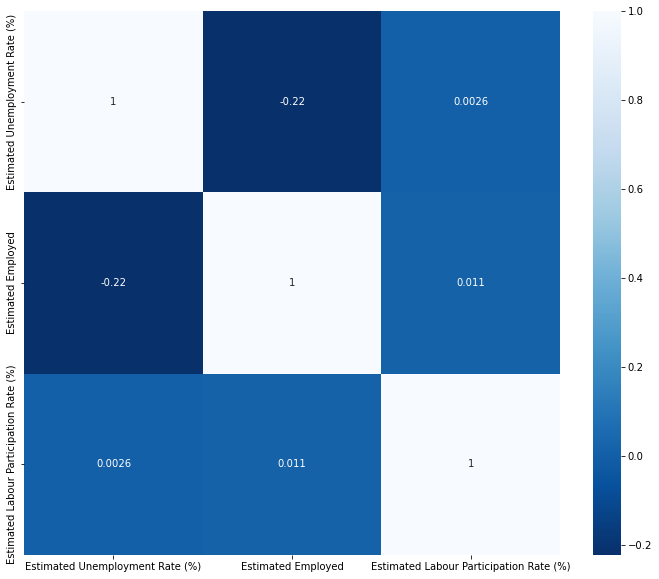

In [26]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(),annot = True , cmap = 'Blues_r')

In [34]:
#unemployment rate by area
byarea = data['Area'].value_counts().rename_axis('Area').reset_index(name = 'Count')
byarea.sort_values(by = 'Area',ascending = False)

,Area,Count
0,Urban,381
1,Rural,359


<AxesSubplot:xlabel='Area', ylabel='count'>

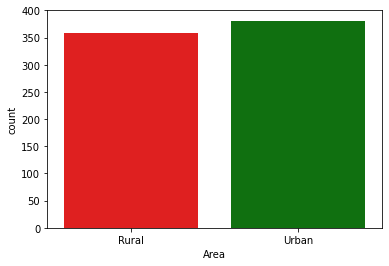

In [35]:
sns.countplot(x = 'Area',data=data,palette = ['red','green'])

In [38]:
#unemployment rate by state
bystate = data['Region'].value_counts().rename_axis('State').reset_index(name = 'Count')
bystate.style.background_gradient(cmap = 'Reds')

,State,Count
0,Andhra Pradesh,28
1,Kerala,28
2,West Bengal,28
3,Uttar Pradesh,28
4,Tripura,28
5,Telangana,28
6,Tamil Nadu,28
7,Rajasthan,28
8,Punjab,28
9,Odisha,28


<AxesSubplot:xlabel='count', ylabel='Region'>

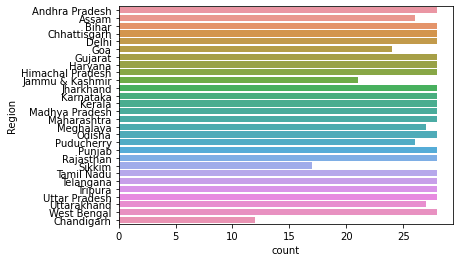

In [39]:
sns.countplot(y = 'Region',data = data)

<AxesSubplot:title={'center':'Unemployment Rate based on Regions'}, xlabel='Estimated Unemployment Rate (%)', ylabel='Region'>

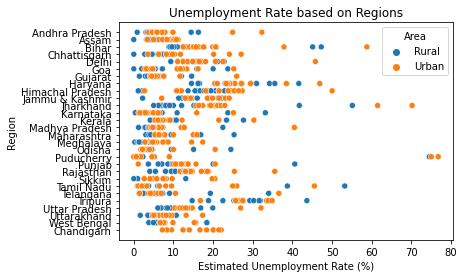

In [42]:
plt.title('Unemployment Rate based on Regions')
sns.scatterplot(y = data['Region'],x = data['Estimated Unemployment Rate (%)'],hue=data['Area'])

In [44]:
data1 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [45]:
data1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [51]:
unemployment = data1[['Region', 'Region.1', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
unemployment = unemployment.groupby(['Region.1', 'Region'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
fig = px.sunburst(unemployment, path=['Region.1', 'Region'], values=' Estimated Unemployment Rate (%)', title='Unemployment rate State and Region Wise',height=850)
fig.show()